In [14]:
#Python Notebook illustrating Clustering 
#importing the Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
#importing the dataset
dataset = pd.read_csv("automobilenew.csv")
dataset.shape

(205, 26)

In [16]:
dataset.head()
#dataset.info() #returns the n number of observations

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [17]:
#creating the array 
#Column Qty and Rate are used for purpose of clustering
X = dataset.iloc[:, [10,11]].values
X[1:10]

array([[168.8,  64.1],
       [171.2,  65.5],
       [176.6,  66.2],
       [176.6,  66.4],
       [177.3,  66.3],
       [192.7,  71.4],
       [192.7,  71.4],
       [192.7,  71.4],
       [178.2,  67.9]])

In [18]:
#Elbow method is later used to find out the optimal number of clusters
from sklearn.cluster import KMeans  #importing k means class from sklearn

In [33]:
#applying kmeans to the data set for two clusters
kmeans = KMeans(n_clusters = 2 , init = 'k-means++', random_state = 42)
# applying k means algorithm to the data with the right number of clusters obtained from Elbow method
y_kmeans = kmeans.fit_predict(X)
#fit predict method returns the observation which data points belong to which cluster
y_kmeans[1:20]
#len(y_kmeans)

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [34]:
len(X[y_kmeans==0])#0=1st clsr

57

In [35]:
len(X[y_kmeans==1]) #1=2nd cluster 

148

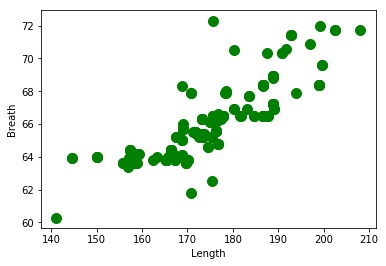

In [36]:
plt.scatter(X[:,0],X[:,1],s=100,c="green")
plt.xlabel("Length")
plt.ylabel("Breath")
plt.show()

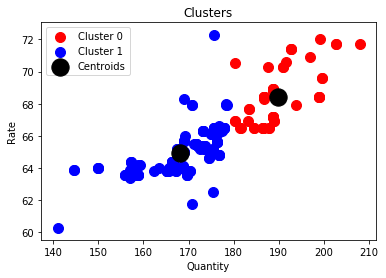

In [38]:
#visualization of three clusters

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Quantity')
plt.ylabel('Rate')
plt.legend()
plt.show()

In [24]:
print("Inertia is", kmeans.inertia_)#Sum of squared distances of samples to their closest cluster center.

Inertia is 11966.566609767659


In [25]:
 #creating kmeans object from KMeans class and pass several parameters
    #n_cluster = number of clusters
    #init = (Random initialisation method)inorder to avoid random initialisation trap we use a method K-means++
    #max_iter = maximum number of iteration to find the final cluster
    #n_init  = number of times k means will run with different initial centroid
wcss = []    #finding out the number of clusters by within cluster sum of squares
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)          #fiiting the k means algorithm to our data x
    wcss.append(kmeans.inertia_) #compute Wcss and append it to the list Inertia computes the Wcss

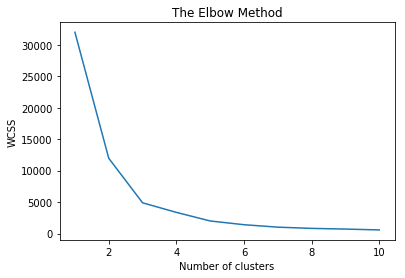

In [26]:

plt.plot(range(1, 11), wcss)  #plotting the Elbow method Graph
plt.title('The Elbow Method') #naming the title
plt.xlabel('Number of clusters')    #labeling x axis   
plt.ylabel('WCSS')          #labelling the y axis          
plt.show()            #Display the chart